# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing with different learning rates

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

It uses the full homeostasis layer (by setting ``alpha_homeo=0.``) - to be compared to a smoother Olshausen-like homeostasis.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

import sys
try:
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 32
    
from shl_scripts.shl_experiments import SHL_set
tag = 'HEH'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta', 'alpha_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
variables = ['eta', 'eta_homeo', 'l0_sparseness']
variables = ['eta', 'eta_homeo', 'alpha_MP']

list_figures = []
list_figures = ['show_dico']

display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'qerror', 'aerror', 'MI', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']
display_variables = ['F']

if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt

    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic')
    #fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')
    for variable in variables:
        experiments = SHL_set(opts, tag=tag, do_run=False)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/HEH.py


In [5]:
%run {experiments.shl.cache_dir}/{tag}.py load

In [6]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff     1956 Sep 25 12:01 cache_dir/HEH.py
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=0.19489_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=0.28569_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=0.41881_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=0.61394_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=0.90000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=1.31934_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=1.93406_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_alpha_MP=2.83521_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2540845 Sep 25 11:49 cache_dir/HEH_eta=0.00433_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  

In [7]:
# this removes older computations and restarts computations
!rm -fr {experiments.shl.cache_dir}/{tag}*pkl
!ls -l {experiments.shl.cache_dir}/{tag}*

-rw-r--r--  1 laurentperrinet  staff  1956 Sep 25 12:01 cache_dir/HEH.py


In [8]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done   2 out of  27 | elapsed:  3.2min remaining: 39.8min
[Parallel(n_jobs=32)]: Done   4 out of  27 | elapsed:  3.2min remaining: 18.4min
[Parallel(n_jobs=32)]: Done   6 out of  27 | elapsed:  3.2min remaining: 11.2min
[Parallel(n_jobs=32)]: Done   8 out of  27 | elapsed:  3.2min remaining:  7.6min
[Parallel(n_jobs=32)]: Done  10 out of  27 | elapsed:  3.2min remaining:  5.5min
[Parallel(n_jobs=32)]: Done  12 out of  27 | elapsed:  3.2min remaining:  4.0min
[Parallel(n_jobs=32)]: Done  14 out of  27 | elapsed:  3.2min remaining:  3.0min
[Parallel(n_jobs=32)]: Done  16 out of  27 | elapsed:  3.2min remaining:  2.2min
[Parallel(n_jobs=32)]: Done  18 out of  27 | elapsed:  3.2min remaining:  1.6min
[Parallel(n_jobs=32)]: Done  20 out of  27 | elapsed:  3.2min remaining:  1.1min
[Parallel(n_jobs=32)]: Done  22 out of  27 | elapse

Running variable eta with value 0.0043


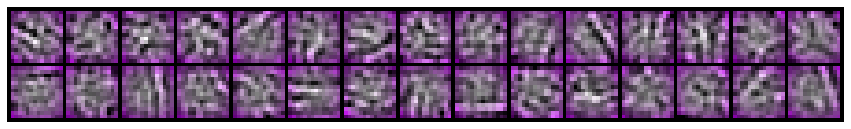

Running variable eta with value 0.0063


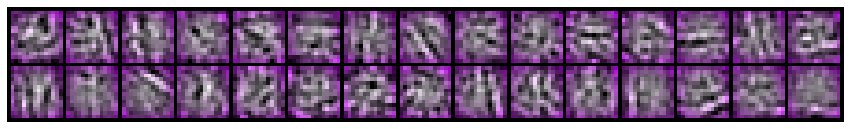

Running variable eta with value 0.0093


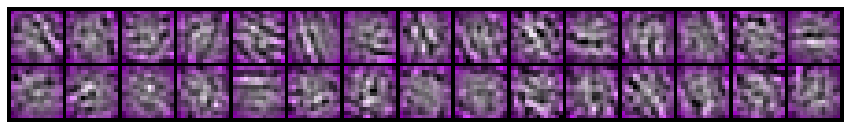

Running variable eta with value 0.0136


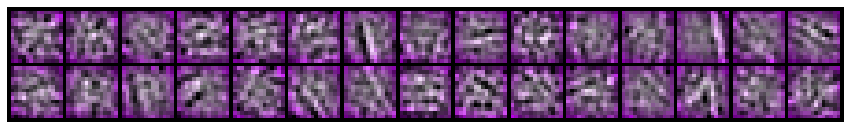

Running variable eta with value 0.0200


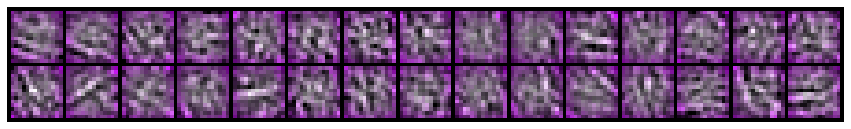

Running variable eta with value 0.0293


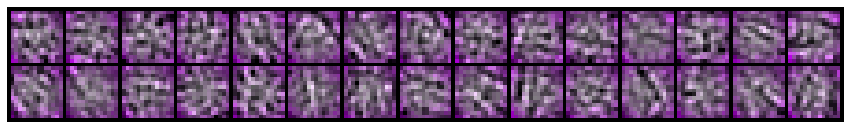

Running variable eta with value 0.0430


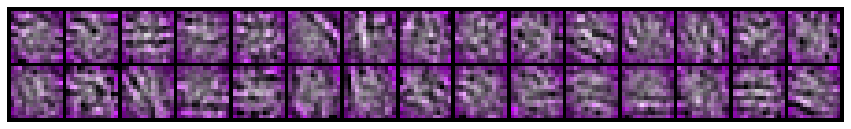

Running variable eta with value 0.0630


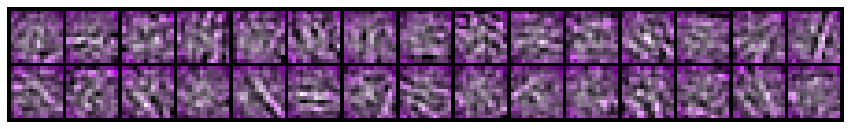

Running variable eta with value 0.0924


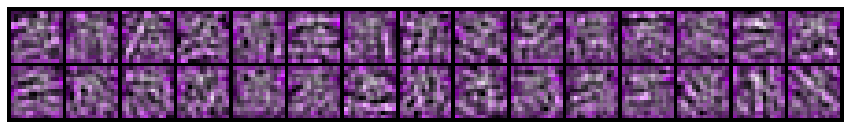

Time evolution of  F


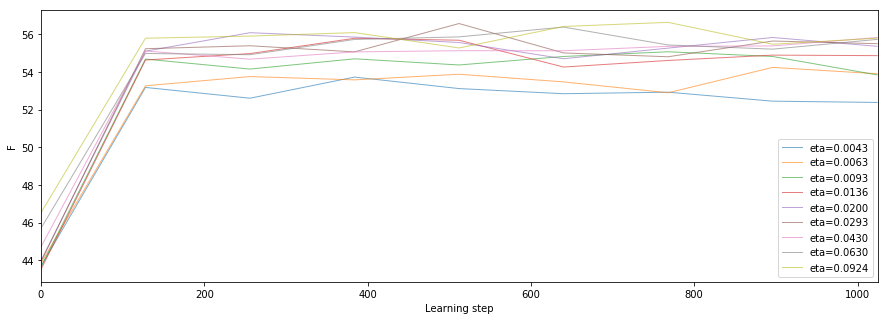

Comparison at the end of learning for  F


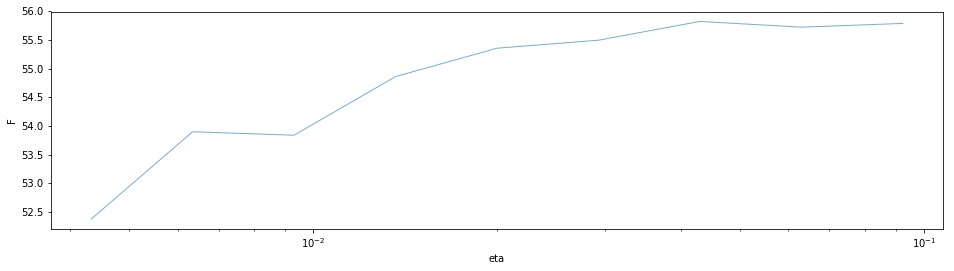

Running variable eta_homeo with value 0.0173


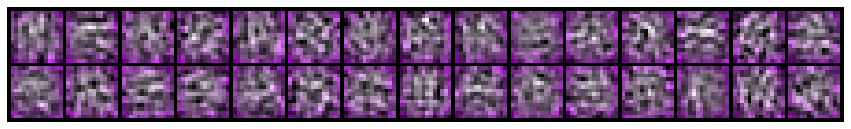

Running variable eta_homeo with value 0.0254


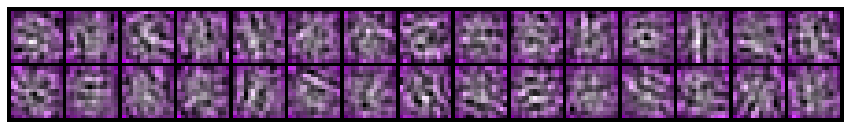

Running variable eta_homeo with value 0.0372


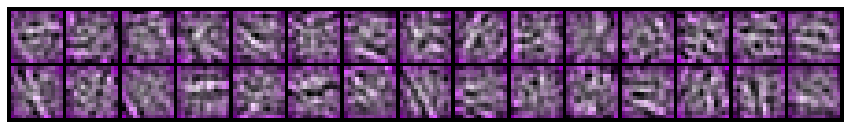

Running variable eta_homeo with value 0.0546


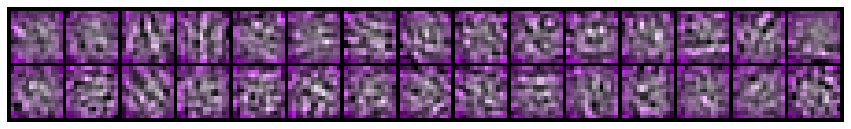

Running variable eta_homeo with value 0.0800


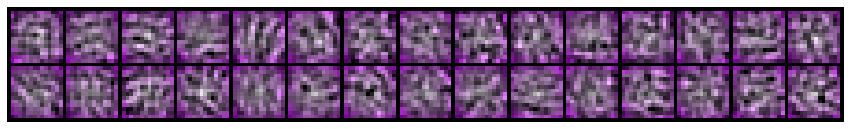

Running variable eta_homeo with value 0.1173


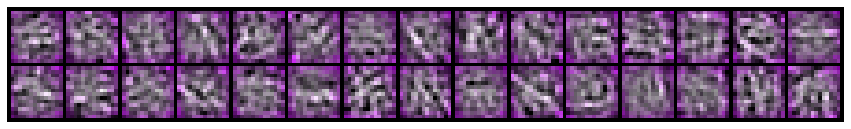

Running variable eta_homeo with value 0.1719


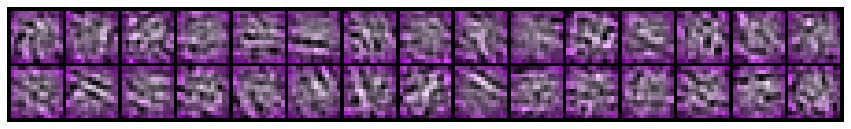

Running variable eta_homeo with value 0.2520


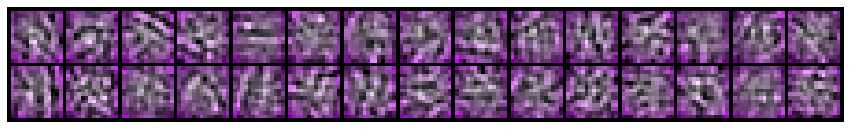

Running variable eta_homeo with value 0.3694


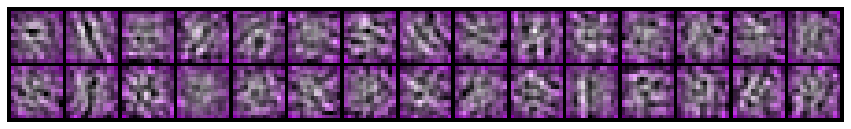

Time evolution of  F


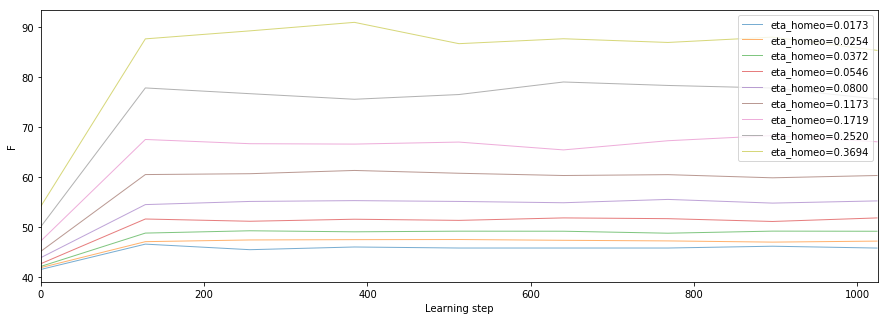

Comparison at the end of learning for  F


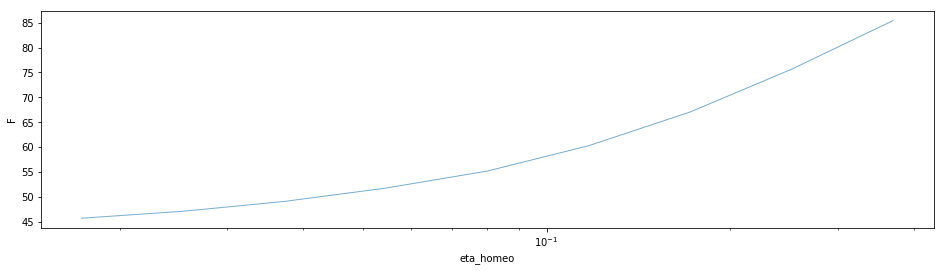

Running variable alpha_MP with value 0.1949


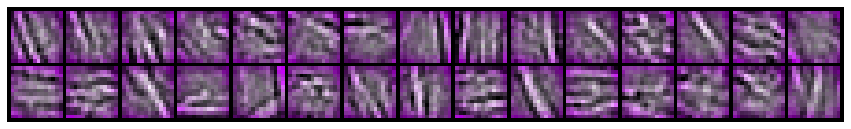

Running variable alpha_MP with value 0.2857


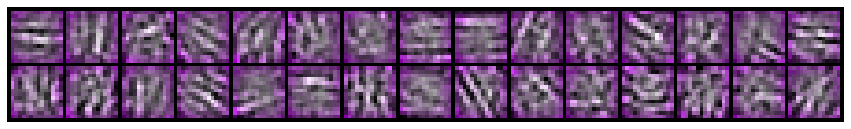

Running variable alpha_MP with value 0.4188


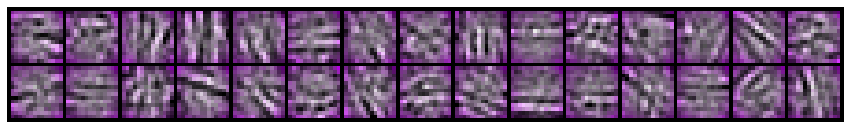

Running variable alpha_MP with value 0.6139


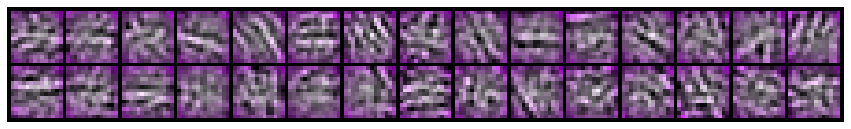

Running variable alpha_MP with value 0.9000


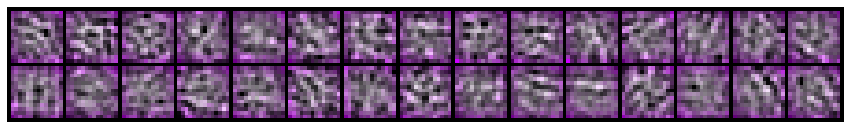

Running variable alpha_MP with value 1.3193


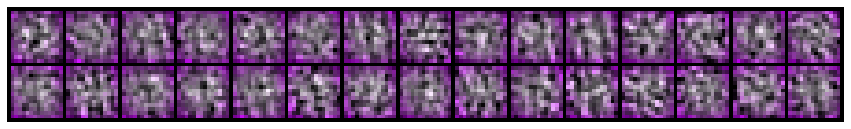

Running variable alpha_MP with value 1.9341


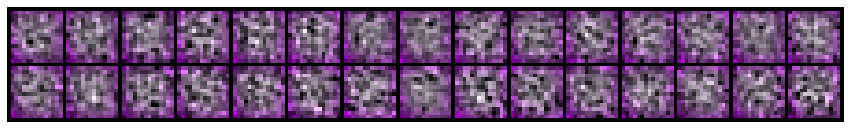

Running variable alpha_MP with value 2.8352


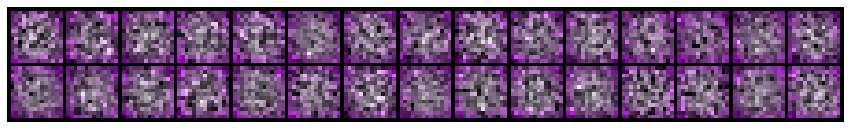

Running variable alpha_MP with value 4.1562


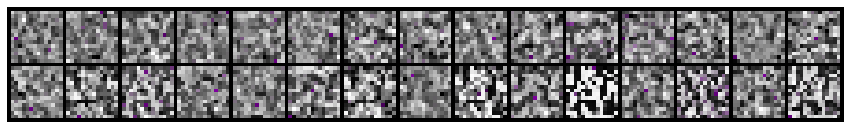

Time evolution of  F


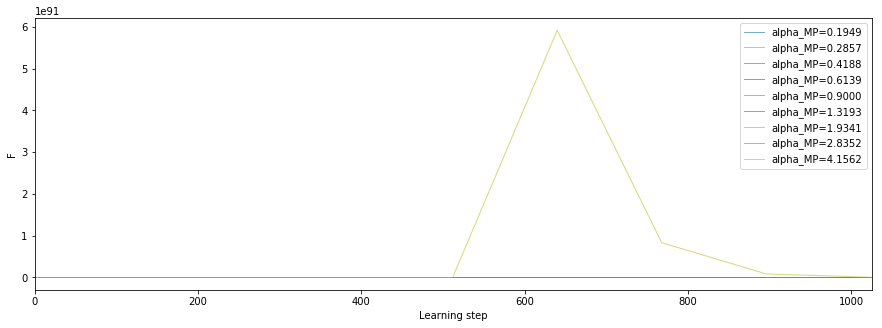

Comparison at the end of learning for  F


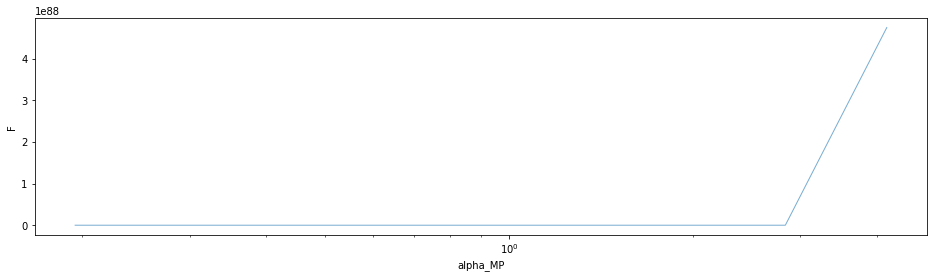

In [9]:
%run {experiments.shl.cache_dir}/{tag}.py plot

In [10]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Tue Sep 25 12:05:27 2018 CEST